NLP ASSIGNMENT 8

Bheemishetty Sai Baba

Exercise 1.
 Accuracy of classifier model with Keras

1. Import the 'one_hot', 'pad_sequences', 'Sequential', 'Dense, Flatten',
'Embedding', and 'pandas' libraries.
2. Define the corpus with the following sentences: This is good pizza, I
love Italian pizza, The best pizza, nice pizza, Excellent pizza, I love
pizza, The pizza was alright, disgusting pineapple pizza, not good
pizza, bad pizza, very bad pizza, I had better pizza.
3. Create class labels for each sentence '1' for positive and '0' for
negative.
4. Create a data frame with 'text' as corpus and 'sentiment' as labels.
5. Extract the vocabulary from the corpus and encode it.
6. Pad the document to the maximum length of the longest sentences to
have uniform length.
7. Define the model with Keras with Embedding (None, 5.8) as output
shape, Flatten (None, 40), and Dense (None, 1).
8. Use epochs = 50, optimizer ='adam', loss='binary_crossentropy', and
metrics=['acc'].
9. What are your conclusions about the model?

Exercise 2.

1. Load nltk, pandas, re, numpy, and matplotlb.
2. Use the Tweets.csv file in Google Drive
3. Take a look at the first five rows.
4. Plot the shares of airlines mentioned in the data.
5. Plot the percentage of positive, negative, and neutral sentiments.
6. In a bar chart, show the number of positive, negative, and neutral
comments by airline.
7. Using Seaborn, show airlines' sentiment confidence.
8. Define the features and labels.
9. Clean the tweets.
10. Vectorize the tweets.
11. Create a train and test (20%) dataset.
12. Import the RandomClassifier model.
13. Define the 'predictions'.
14. Generate the confusion matrix, the classification report, and the
accuracy score.
15. What is your conclusion?


### Excersice 1



Import the necessary Libraries

In [32]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import pandas as pd

Define the Corpus

In [33]:
# Define the corpus
corpus = ["This is good pizza", "I love Italian pizza", "The best pizza", "nice pizza",
          "Excellent pizza", "I love pizza", "The pizza was alright", "disgusting pineapple pizza",
          "not good pizza", "bad pizza", "very bad pizza", "I had better pizza"]


Create a Class Labels

In [34]:
#  class labels
labels = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


Define the Data Frame

In [35]:
# Creating a DataFrame
df = pd.DataFrame({'text': corpus, 'sentiment': labels})


Encoding the Vocabilary

In [36]:
# Extracting the vocabulary and encode it
vocab_size = 50  # Adjust as needed
encoded_corpus = [one_hot(sentence, vocab_size) for sentence in corpus]


In [37]:
# Padding  the documents
max_length = max([len(s.split()) for s in corpus])
padded_corpus = pad_sequences(encoded_corpus, maxlen=max_length, padding='post')


In [38]:
# Convert labels to NumPy array
labels = np.array(labels)


Dedining the Models

In [39]:
# Defining the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [40]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
# Prining the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train The Model

In [43]:

# Fit the model
model.fit(padded_corpus, labels, epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 596ms/step - loss: 0.6916 - accuracy: 0.6667
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6899 - accuracy: 0.6667
Epoch 3/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6882 - accuracy: 0.7500
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6864 - accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 0.6847 - accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6812 - accuracy: 0.6667
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6795 - accuracy: 0.6667
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6778 - accuracy: 0.6667
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6760 - accuracy: 0.7500
Epoch 11/50
1/1 [===========

In [44]:
# Evaluating the model accuracy
loss, accuracy = model.evaluate(padded_corpus, labels)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%')


1/1 [==============================] - 0s 130ms/step - loss: 0.6001 - accuracy: 0.9167

Model Accuracy: 91.67%


Plotting the Training Accuracy and Training Loss

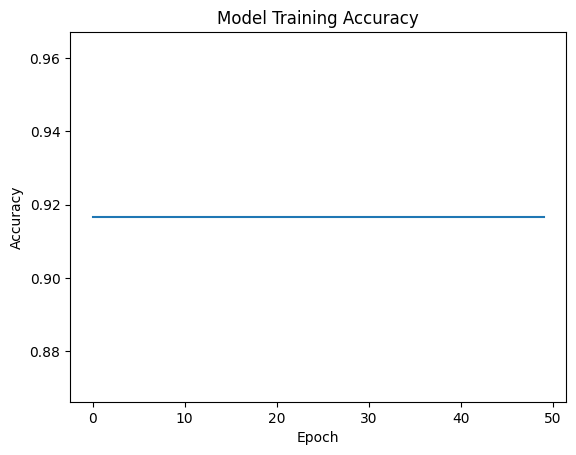

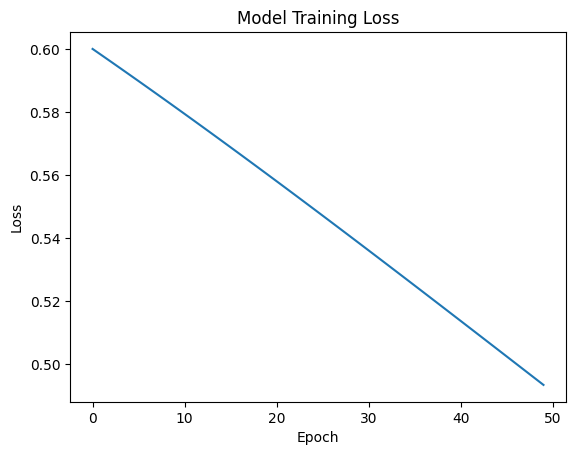

In [45]:
import matplotlib.pyplot as plt

# Fit the model and store the training history
history = model.fit(padded_corpus, labels, epochs=50, verbose=0)

# Ploting training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Ploting training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### Excersice 2

Exercise 2.

1. Load nltk, pandas, re, numpy, and matplotlb.
2. Use the Tweets.csv file in Google Drive
3. Take a look at the first five rows.
4. Plot the shares of airlines mentioned in the data.
5. Plot the percentage of positive, negative, and neutral sentiments.
6. In a bar chart, show the number of positive, negative, and neutral
comments by airline.
7. Using Seaborn, show airlines' sentiment confidence.
8. Define the features and labels.
9. Clean the tweets.
10. Vectorize the tweets.
11. Create a train and test (20%) dataset.
12. Import the RandomClassifier model.
13. Define the 'predictions'.
14. Generate the confusion matrix, the classification report, and the
accuracy score.
15. What is your conclusion?

Importing the Necesary Libraries

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import pandas as pd

In [48]:
#  loading the Data
df = pd.read_csv('Tweets.csv')

In [49]:
# Checking the  first 5 rows
print(df.head())

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

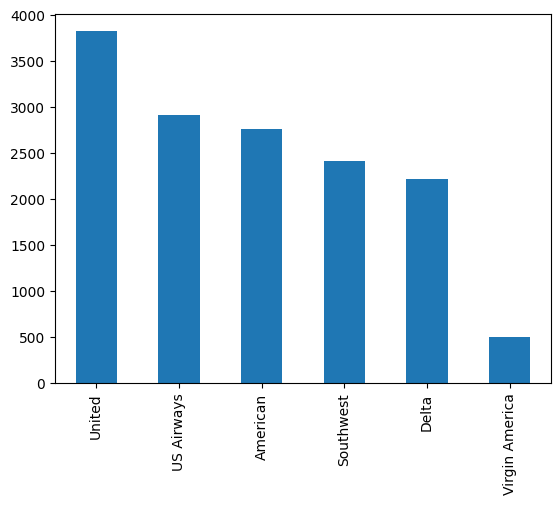

In [50]:
# Ploting airline shares
airline_shares = df.airline.value_counts().plot(kind='bar')

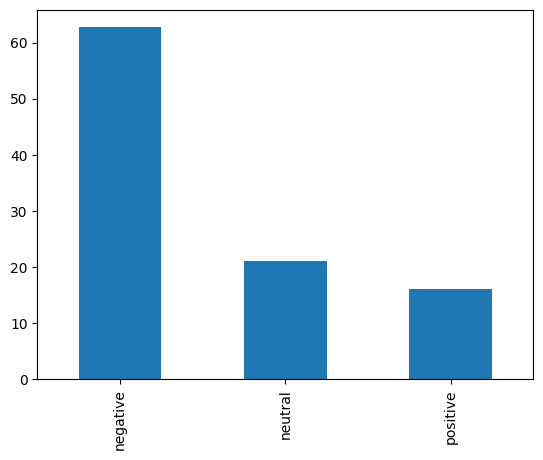

In [51]:
# Plotting sentiment percentages
sentiment_pct = df.airline_sentiment.value_counts(normalize=True).mul(100).plot(kind='bar')

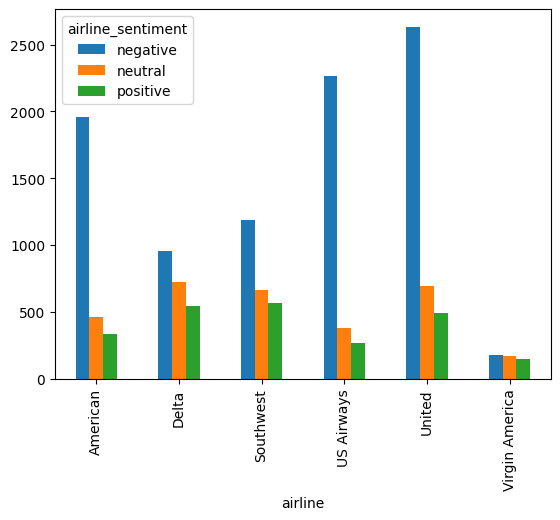

In [52]:
# Bar chart with sentiment counts by airline
sentiment_counts = pd.crosstab(df.airline, df.airline_sentiment).plot(kind='bar')


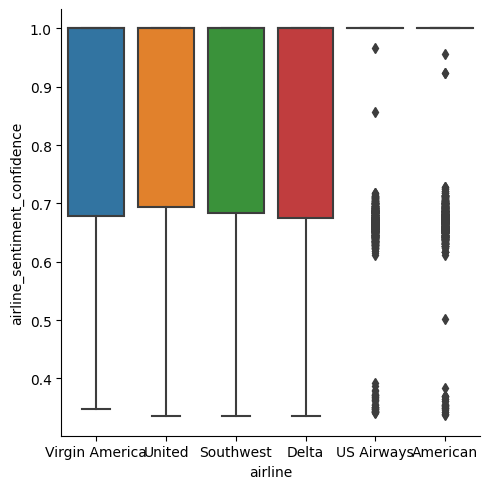

In [53]:
# Box plots of confidence by airline
import seaborn as sns
sns.catplot(x='airline', y='airline_sentiment_confidence', data=df, kind='box')

In [54]:
# Defining features and labels
X = df['text']
y = df['airline_sentiment']

In [55]:
# Cleaning tweets
X = X.apply(lambda x: re.sub(r'^RT[\s]+', '', x))
X = X.apply(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x))
X = X.apply(lambda x: re.sub(r'#', '', x))

In [56]:
# Vectorizing tweets
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [57]:
# Creating a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# Random Classifier model fit
model = MultinomialNB()
model.fit(X_train, y_train)
# predictions generated
predictions = model.predict(X_test)


In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming 'y_test' is the true labels and 'predictions' is the predicted labels

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:\n", class_report)

# Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
 [[1880    8    1]
 [ 499   77    4]
 [ 380   12   67]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.68      1.00      0.81      1889
     neutral       0.79      0.13      0.23       580
    positive       0.93      0.15      0.25       459

    accuracy                           0.69      2928
   macro avg       0.80      0.42      0.43      2928
weighted avg       0.74      0.69      0.61      2928


Accuracy Score: 0.6912568306010929
